In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
rho = np.array([[0.4, 2], [1, 0.6]])
rho = np.dot(rho, rho.T)
trace = np.trace(rho)
rho = rho/trace
print(rho)

[[0.75362319 0.28985507]
 [0.28985507 0.24637681]]


In [26]:
eigval, eigvec = np.linalg.eig(rho)

In [27]:
print(eigval)
print(eigvec)

[0.88515021 0.11484979]
[[ 0.91063291 -0.41321628]
 [ 0.41321628  0.91063291]]


In [28]:
e1 = eigval[0]
e2 = eigval[1]
v1 = eigvec[:,0].reshape(-1,1)
v2 = eigvec[:,1].reshape(-1,1)

In [29]:
diag = np.diag(eigval)

In [30]:
diag

array([[0.88515021, 0.        ],
       [0.        , 0.11484979]])

In [31]:
a = np.dot(np.dot(eigvec, diag), np.linalg.inv(eigvec))

In [34]:
a

array([[0.75362319, 0.28985507],
       [0.28985507, 0.24637681]])

In [38]:
#c == rho
c = e1*np.dot(v1, v1.T) + e2*np.dot(v2, v2.T)

In [36]:
c

array([[0.75362319, 0.28985507],
       [0.28985507, 0.24637681]])

In [39]:
np.trace(np.dot(rho, rho))

0.7966813694601977

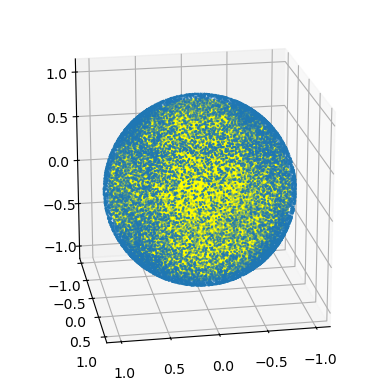

In [89]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 0.95*np.outer(np.cos(u), np.sin(v))
y = 0.95*np.outer(np.sin(u), np.sin(v))
z = 0.95*np.outer(np.ones(np.size(u)), np.cos(v))

x1 = np.random.uniform(low=-0.5, high=0.5, size=(20000, 1))
y1 = np.random.uniform(low=-0.5, high=0.5, size=(20000, 1))
z1 = np.random.uniform(low=-0.5, high=0.5, size=(20000, 1))

r = np.sqrt(x1**2 + y1**2 + z1**2)
x1 = x1/r
y1 = y1/r
z1 = z1/r

ax.plot_surface(x, y, z, facecolor='yellow')
ax.scatter(x1, y1, z1, s=0.3)

ax.view_init(20, 80)
ax.set_aspect('equal')
plt.show()

In [132]:
def randomComplex(samples=10):
    c_number = np.empty(shape=(samples,1), dtype='complex')
    real_imag = np.random.uniform(low=-1, high=1, size=(samples,2))
    norms = np.linalg.norm(real_imag, axis=1).reshape(-1,1)
    real_imag = real_imag/norms

    c_number.real = real_imag[:,0:1]
    c_number.imag = real_imag[:,1:2]

    return c_number

In [160]:
def qubitStates(num_qubits=1, num_states=10):
    states = np.empty(shape=(num_states, 2**num_qubits), dtype='complex')
    for i in range(2**num_qubits):
        states[:,i:i+1] = randomComplex(samples=num_states)
    return states

In [161]:
qubit = qubitStates(num_qubits=1, num_states=10)

In [162]:
print(qubit)

[[ 0.81238652-0.58311932j  0.72050841+0.69344619j]
 [-0.77160039+0.63610757j  0.96860483+0.24860549j]
 [ 0.67812893-0.73494296j -0.56765186+0.82326871j]
 [-0.77791544+0.62836897j  0.475625  -0.87964815j]
 [-0.76416268-0.64502356j -0.24837748+0.96866332j]
 [ 0.75625922+0.65427211j -0.09857636-0.99512949j]
 [ 0.14398707-0.98957957j  0.50069732+0.86562243j]
 [-0.33212622-0.94323495j -0.27961372+0.96011258j]
 [-0.66270763+0.74887823j -0.35933819+0.93320741j]
 [-0.75343122+0.65752673j  0.06499345+0.99788569j]]
